In [265]:
#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the following 2 lines are only needed for Mac OS machines
import os
from random import shuffle
import matplotlib.pyplot as plt 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [39]:
# helper function to find medians and normalize data
def divide_by_medians(data, ignore_positions=[]):
    data_count = len(data)
    param_count = len(data[0])

    sums = [0] * param_count

    for data_point in data:
        for pos, datum in enumerate(data_point):
            sums[pos] += datum

    medians = [s/data_count for s in sums]

    normalized_data = []
    for data_point in data:
        normalized_point = []
        for pos, datum in enumerate(data_point):
            if pos in ignore_positions:
                normalized_point.append(datum)
            else:
                normalized_point.append(datum/medians[pos])

        normalized_data.append(normalized_point)

    return normalized_data, medians

In [47]:
raw_xdata = [[0., 10.0, 200.0, 24.3], 
 [1., 10.0, 200.0, 24.3], 
 [2., 10.0, 200.0, 24.3], 
 [0., 10.0, 200.0, 51.8], 
 [1., 10.0, 200.0, 51.8],
         
 [2., 10.0, 200.0, 51.8], 
 [0., 10.0, 200.0, 96.2], 
 [1., 10.0, 200.0, 96.2], 
 [2., 10.0, 200.0, 96.1], 
 [0., 10.0, 200.0, 170.1],
         
 [1., 10.0, 200.0, 170.1], 
 [2., 10.0, 200.0, 170.1], 
 [0., 10.0, 500.0, 7.0], 
 [1., 10.0, 500.0, 7.0], 
 [2., 10.0, 500.0, 7.0], 
         
 [0., 10.0, 500.0, 21.2], 
 [1., 10.0, 500.0, 21.2], 
 [2., 10.0, 500.0, 21.2], 
 [0., 10.0, 500.0, 43.2], 
 [1., 10.0, 500.0, 43.2], 
         
 [1., 10.0, 700.0, 4.9], 
 [2., 10.0, 700.0, 4.9], 
 [0., 10.0, 700.0, 14.3], 
 [1., 10.0, 700.0, 14.3], 
 [2., 10.0, 700.0, 14.3],
         
 [2., 10.0, 500.0, 43.2], 
 [0., 10.0, 500.0, 79.1], 
 [1., 10.0, 500.0, 79.1], 
 [2., 10.0, 500.0, 79.1], 
 [0., 10.0, 700.0, 4.8], 
         
 [0., 10.0, 700.0, 29.7], 
 [1., 10.0, 700.0, 29.7], 
 [2., 10.0, 700.0, 29.7], 
 [0., 10.0, 700.0, 55.3], 
 [1., 10.0, 700.0, 55.3], 
 [2., 10.0, 700.0, 55.3], 
         
 [0., 10.0, 1000.0, 3.92], 
 [1., 10.0, 1000.0, 3.92], 
 [2., 10.0, 1000.0, 3.92], 
 [0., 10.0, 1000.0, 11.7], 
 [1., 10.0, 1000.0, 11.7], 
         
 [2., 10.0, 1000.0, 11.7], 
 [0., 10.0, 1000.0, 25.2], 
 [1., 10.0, 1000.0, 25.2], 
 [2., 10.0, 1000.0, 25.2], 
 [0., 10.0, 1000.0, 41.6], 
 [1., 10.0, 1000.0, 41.6], 
 [2., 10.0, 1000.0, 41.6]]

#Part 2 output data for above specified Mode and conditons: VL (V) and Power out (W)
raw_ydata = [[46.0, 87.3], 
         [27.9, 64.2], 
         [27.9, 32.1], 
         [46.0, 40.9], 
         [92.1, 163.9], 
         [59.5, 68.5], 
         [46.0, 22.0], 
         [92.1, 88.2], 
         [110.6, 127.2], 
         [46.0, 12.4], 
         [92.1, 49.9], 
         [184.2, 199.6], 
         [48.4, 335.3], 
         [20.8, 124.3], 
         [20.8, 62.1], 
         [48.4, 110.7], 
         [96.8, 442.9], 
         [63.1, 188.2], 
         [48.4, 54.3], 
         [96.9, 217.3], 
         [128.7, 383.6], 
         [48.4, 29.6], 
         [96.8, 118.7], 
         [193.7, 474.8], 
         [49.3, 496.1], 
         [20.4, 171.2], 
         [20.4, 85.6], 
         [49.3, 169.9], 
         [98.6, 679.9], 
         [59.7, 249.8], 
         [49.3, 81.8], 
         [98.6, 327.4], 
         [124.1, 518.9], 
         [49.305, 43.9], 
         [98.6, 175.8], 
         [197.2, 703.3], 
         [50.8, 658.9], 
         [23.1, 272.9], 
         [23.1, 136.4], 
         [50.8, 220.7], 
         [101.6, 883.1], 
         [69.0, 407.2], 
         [50.8, 102.5], 
         [101.6, 410.0], 
         [148.6, 877.2], 
         [50.8, 62.0], 
         [101.6, 248.3], 
         [203.2, 993.5]]

In [48]:
'''>>>>> start CodeP3.2.1F24
    V.P. Carey ME249, Fall 2024 

Intro to Neural Network Modeling 
Keras model for PV power system'''


#input data array created above

xdata, medians = divide_by_medians(raw_xdata, ignore_positions={0})
print(medians)

_, Tamed, IDmed, RLmed = medians
if Tamed == 0:
    Tamed = 1

xarray= np.array(xdata)
print (xdata)
print (xarray)

# define meadian values of output variables - add your values here
VLmed = 1.
Wdmed = 1

#output data array created above
ydata, medians = divide_by_medians(raw_ydata)
VLmed, Wdmed = medians

yarray= np.array(ydata)
print (ydata)
print (yarray)

[1.0, 10.0, 600.0, 42.465833333333336]
[[0.0, 1.0, 0.3333333333333333, 0.5722247296846484], [1.0, 1.0, 0.3333333333333333, 0.5722247296846484], [2.0, 1.0, 0.3333333333333333, 0.5722247296846484], [0.0, 1.0, 0.3333333333333333, 1.2198041562825015], [1.0, 1.0, 0.3333333333333333, 1.2198041562825015], [2.0, 1.0, 0.3333333333333333, 1.2198041562825015], [0.0, 1.0, 0.3333333333333333, 2.2653505759532173], [1.0, 1.0, 0.3333333333333333, 2.2653505759532173], [2.0, 1.0, 0.3333333333333333, 2.2629957416746795], [0.0, 1.0, 0.3333333333333333, 4.0055731077925385], [1.0, 1.0, 0.3333333333333333, 4.0055731077925385], [2.0, 1.0, 0.3333333333333333, 4.0055731077925385], [0.0, 1.0, 0.8333333333333334, 0.16483839949763535], [1.0, 1.0, 0.8333333333333334, 0.16483839949763535], [2.0, 1.0, 0.8333333333333334, 0.16483839949763535], [0.0, 1.0, 0.8333333333333334, 0.4992248670499813], [1.0, 1.0, 0.8333333333333334, 0.4992248670499813], [2.0, 1.0, 0.8333333333333334, 0.4992248670499813], [0.0, 1.0, 0.83333333

In [51]:
# sort into training and validation
combined_data = list(zip(xdata, ydata))

test_count = len(combined_data) // 3
training_count = len(combined_data) - test_count

shuffle(combined_data)

training_data = combined_data[:training_count]
testing_data = combined_data[training_count:]

training_xdata = []
training_ydata = []

validation_xdata = []
validation_ydata = []

for x, y in training_data:
    training_xdata.append(x)
    training_ydata.append(y)

for x,y in testing_data:
    validation_xdata.append(x)
    validation_ydata.append(y)


In [273]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=.5)

model = keras.Sequential([
    keras.layers.Dense(14, activation=K.elu, input_shape=[4], kernel_initializer=initializer),
    keras.layers.Dense(18, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(10, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(4, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(2, kernel_initializer=initializer)
])

#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.020)
model.compile(loss='mean_absolute_error',optimizer=rms)


/opt/anaconda3/envs/python3-10_keras_env/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [274]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(training_xdata,training_ydata,epochs=800,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model')

Epoch 1/800
1/1 [==============================] - 0s 186ms/step - loss: 3.1447
Epoch 2/800
1/1 [==============================] - 0s 3ms/step - loss: 1.0898
Epoch 3/800
1/1 [==============================] - 0s 2ms/step - loss: 0.8223
Epoch 4/800
1/1 [==============================] - 0s 3ms/step - loss: 0.7360
Epoch 5/800
1/1 [==============================] - 0s 3ms/step - loss: 0.6757
Epoch 6/800
1/1 [==============================] - 0s 2ms/step - loss: 0.6186
Epoch 7/800
1/1 [==============================] - 0s 2ms/step - loss: 0.5728
Epoch 8/800
1/1 [==============================] - 0s 3ms/step - loss: 0.5632
Epoch 9/800
1/1 [==============================] - 0s 2ms/step - loss: 0.5819
Epoch 10/800
1/1 [==============================] - 0s 2ms/step - loss: 0.6556
Epoch 11/800
1/1 [==============================] - 0s 2ms/step - loss: 0.6012
Epoch 12/800
1/1 [==============================] - 0s 2ms/step - loss: 0.5624
Epoch 13/800
1/1 [==============================] - 0s 2ms/

In [275]:


# This line of code can be used to reconstruct the saved model.

recon_model = keras.models.load_model("best_model")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.



/opt/anaconda3/envs/python3-10_keras_env/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [276]:
predictions = recon_model.predict(validation_xdata)

pv, pw = [], []
rv, rw = [], []

abs_err = 0
for pred, real in zip(predictions, validation_ydata):
    pred_v, pred_w = pred
    real_v, real_w = real
    abs_err += abs(real_w - pred_w)
    pv.append(pv)
    pw.append(pred_w)
    rv.append(real_v)
    rw.append(real_w)

mean_abs_err = abs_err/len(pw)
print(mean_abs_err)

1/1 [==============================] - 0s 38ms/step
0.5521204795764811


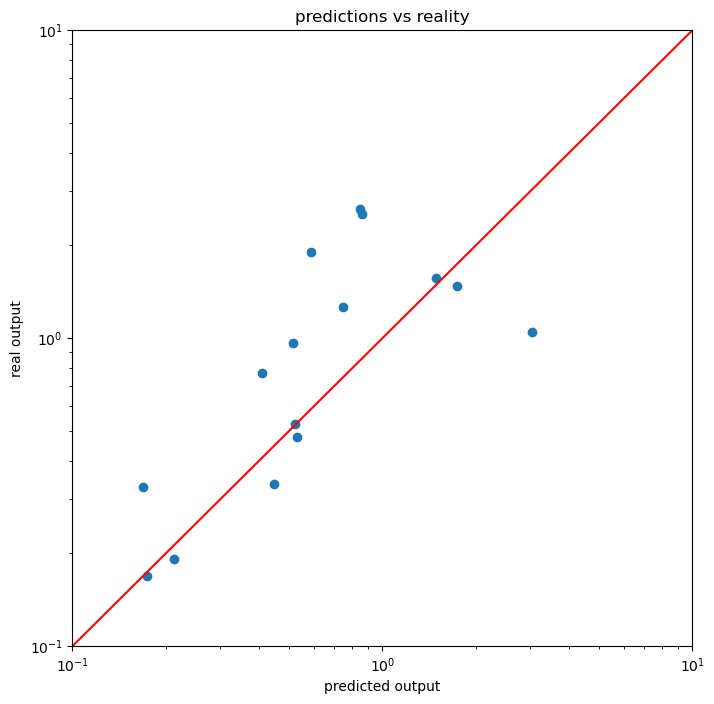

In [277]:
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas

plt.scatter(pw, rw)
# plt.scatter(pv, rv)
plt.title('predictions vs reality')
plt.xlabel('predicted output') 
plt.ylabel('real output')
plt.loglog()
plt.xlim(xmax = 10, xmin = 0.1)
plt.ylim(ymax = 10, ymin = 0.1)
# Generate red y=x line
x_data = np.linspace(0.1, 10.0, num=3)
y_data = x_data
plt.plot(x_data, y_data, color='red')
plt.show()